In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler

pathResults = os.path.join("..", "results", "feature_importance")
path_to_pkls = os.path.join("..", "data", "processed_files", "pkls")

import matplotlib
from matplotlib.ticker import ScalarFormatter

font = {"weight": "bold", "size": 14}

matplotlib.rc("font", **font)

In [2]:
morf_map = {
    "1": "slope",
    "2": "aspect",
    "3": "shaded relief\neast",
    "4": "profile\nconvexity",
    "5": "plan\nconvexity",
    "6": "long\ncurvature",
    "7": "section\nconvexity",
    "8": "minimum\ncurvature",
    "9": "maximum\ncurvature",
    "10": "shaded relief\nsouth",
}

In [3]:
with open(os.path.join(path_to_pkls, "keys_lstm.pkl"), "rb") as fp:
    lstm_keys = pickle.load(fp)
lstm_keys = [x for x in lstm_keys if "morf" not in x]
morf_keys = [value for value in morf_map.values()]
keys = lstm_keys + morf_keys

### LSTM

In [4]:
with open(os.path.join(pathResults, "feature_importance_lstm.pkl"), "rb") as fs:
    scores = pickle.load(fs)
scores_lstm = {k: [] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    value = np.mean(value)

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index]

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_lstm.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_lstm.items():
    if key in morf_keys:
        scores_lstm[key] = np.mean(scores_lstm[key])
    else:
        scores_lstm[key] = np.sum(scores_lstm[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

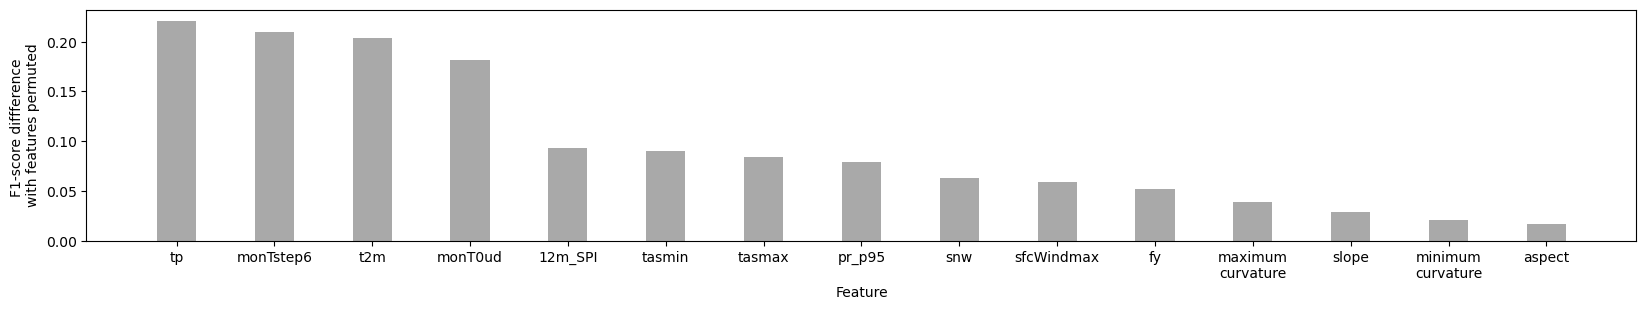

In [5]:
lstm_feature_importance = pd.DataFrame(
    data=scores_lstm.values(), index=scores_lstm.keys(), columns=["LSTM"]
)
lstm_feature_importance = lstm_feature_importance.sort_values(
    by=["LSTM"], ascending=False
)

plt.figure(figsize=(20, 3))
plt.bar(
    list(lstm_feature_importance[:15].index),
    [i[0] for i in lstm_feature_importance[:15].values],
    width=0.4,
    color="darkgray",
)
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### MLP. Monthly features

In [6]:
with open(os.path.join(pathResults, "feature_importance_mlp.pkl"), "rb") as fs:
    scores = pickle.load(fs)
scores_mlp = {k: [] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    # Average over permutations
    value = np.mean(scores[key])

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index] + key.split("_")[1]

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_mlp.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_mlp.items():
    if key in morf_keys:
        scores_mlp[key] = np.mean(scores_mlp[key])
    else:
        scores_mlp[key] = np.sum(scores_mlp[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

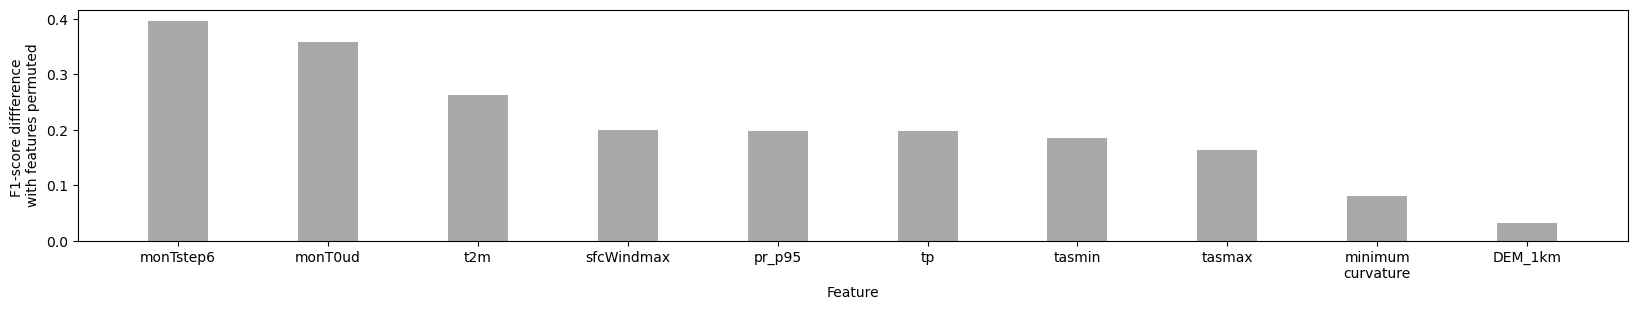

In [7]:
mlp_feature_importance = pd.DataFrame(
    data=scores_mlp.values(), index=scores_mlp.keys(), columns=["MLP"]
)
mlp_feature_importance = mlp_feature_importance.sort_values(by=["MLP"], ascending=False)

plt.figure(figsize=(20, 3))
plt.bar(
    list(mlp_feature_importance[:10].index),
    [i[0] for i in mlp_feature_importance[:10].values],
    width=0.4,
    color="darkgray",
)
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### Catboost

In [8]:
with open(
    os.path.join("/app/ArableLandSuitability/data/processed_files/pkls/keys.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)

In [9]:
with open(os.path.join(pathResults, "feature_importance_catboost.pkl"), "rb") as fs:
    scores = pickle.load(fs)
scores_catboost = {k: [] for k in keys}

# Average over all permutations:
for key, value in scores.items():
    value = np.mean(scores[key])

    # Rename morphological features
    if any(morf in key for morf in ["morf_3", "morf_11", "morf_33", "morf_47"]):
        key_index = key.split("_")[2]
        key = morf_map[key_index]

    # Collect all similar features in list (12 values for climatic, 4 - for morphological)
    for key_res, value_res in scores_catboost.items():
        if key_res in key:
            value_res.append(value)

# Sum up values from 1 features (12 values for climatic, 4 - for morphological)
for key, value in scores_catboost.items():
    if key in morf_keys:
        scores_catboost[key] = np.mean(scores_catboost[key])
    else:
        scores_catboost[key] = np.sum(scores_catboost[key])

Text(0, 0.5, 'F1-score diffference \nwith features permuted')

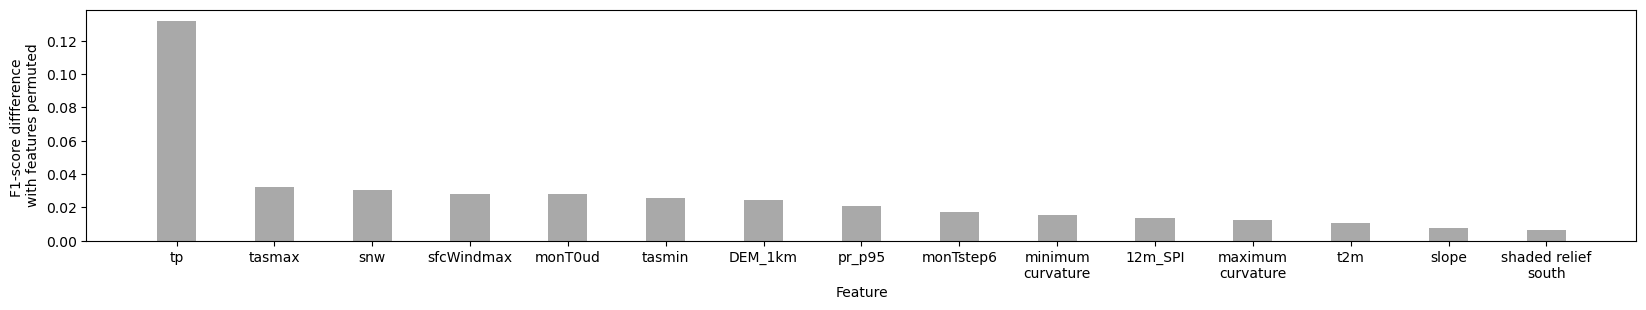

In [10]:
catboost_feature_importance = pd.DataFrame(
    data=scores_catboost.values(), index=scores_catboost.keys(), columns=["Catboost"]
)
catboost_feature_importance = catboost_feature_importance.sort_values(
    by=["Catboost"], ascending=False
)

plt.figure(figsize=(20, 3))
plt.bar(
    list(catboost_feature_importance[:15].index),
    [i[0] for i in catboost_feature_importance[:15].values],
    width=0.4,
    color="darkgray",
)
plt.xlabel("Feature")
plt.ylabel("F1-score diffference \nwith features permuted")

### Union of top features

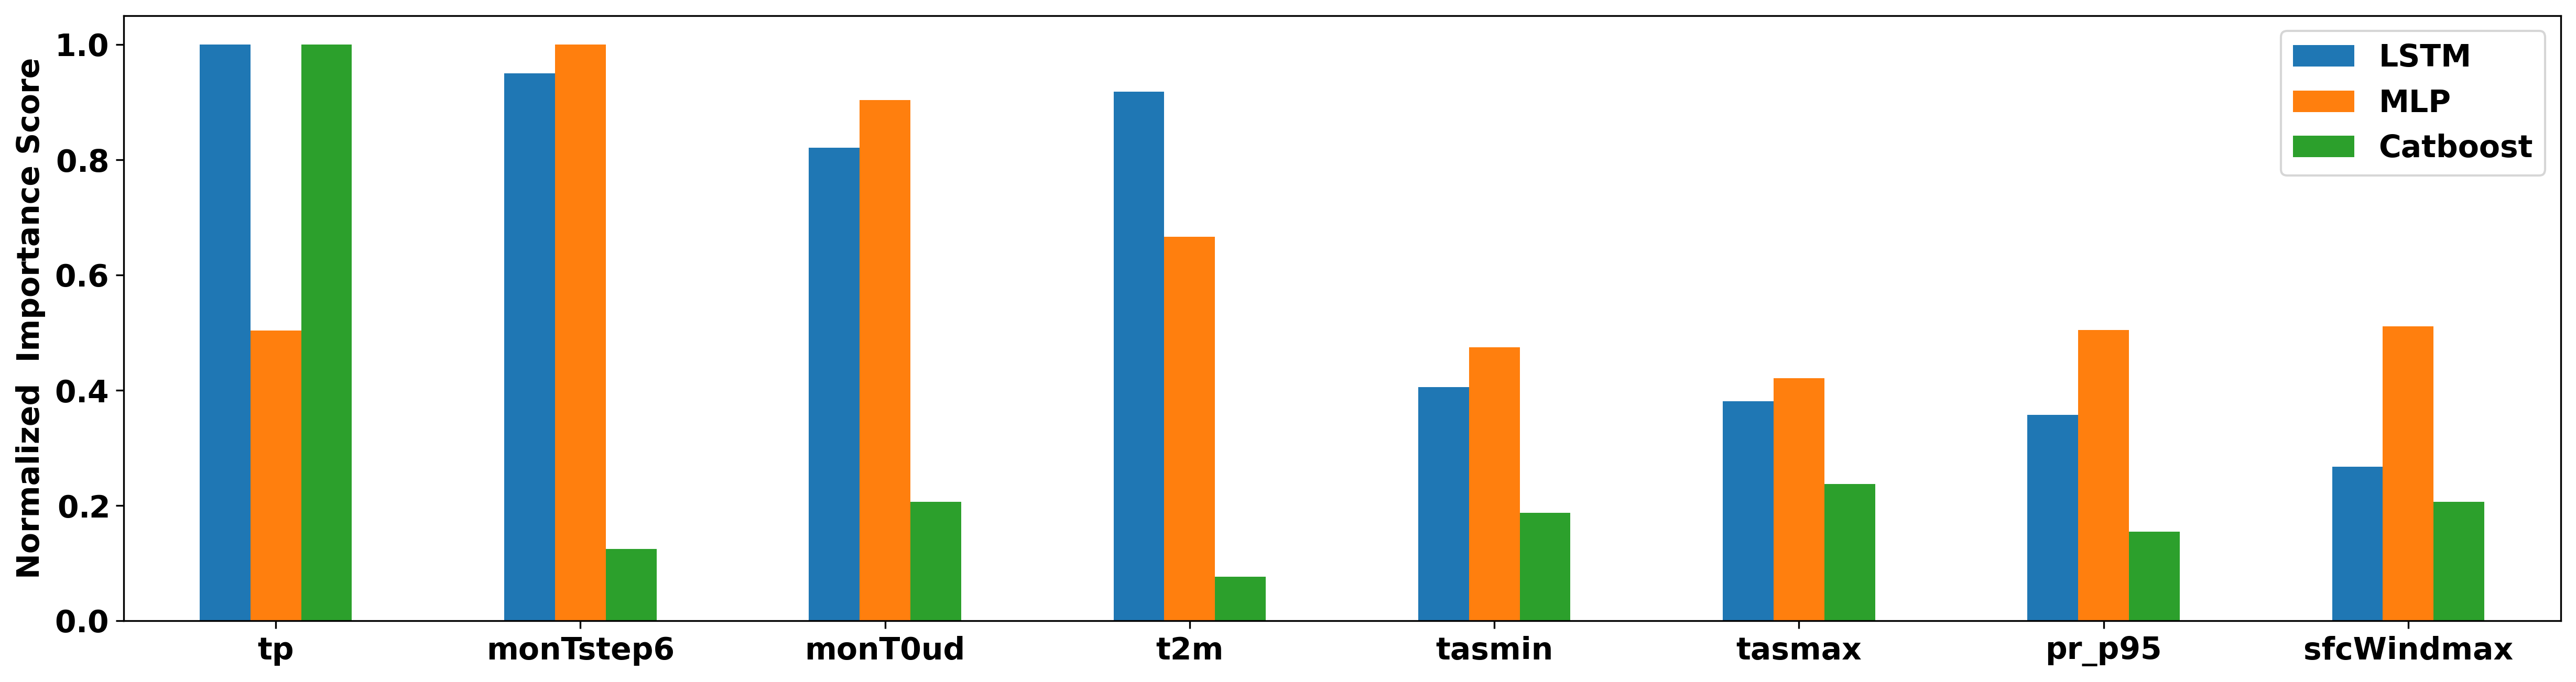

In [15]:
# Extract the importance scores for standardization
scores_lstm = lstm_feature_importance["LSTM"].values.reshape(-1, 1)
scores_mlp = mlp_feature_importance["MLP"].values.reshape(-1, 1)
scores_catboost = catboost_feature_importance["Catboost"].values.reshape(-1, 1)

# Standardize the scores
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(scores_lstm)
mlp_scaled = scaler.fit_transform(scores_mlp)
catboost_scaled = scaler.fit_transform(scores_catboost)

# Create a DataFrame for the standardized scores
df_standardized_lstm = pd.DataFrame(
    {
        "LSTM": lstm_scaled.flatten(),
    },
    index=lstm_feature_importance.index,
)

df_standardized_mlp = pd.DataFrame(
    {
        "MLP": mlp_scaled.flatten(),
    },
    index=mlp_feature_importance.index,
)

df_standardized_catboost = pd.DataFrame(
    {
        "Catboost": catboost_scaled.flatten(),
    },
    index=catboost_feature_importance.index,
)

df_standardized = pd.merge(
    df_standardized_lstm, df_standardized_mlp, left_index=True, right_index=True
)
df_standardized = pd.merge(
    df_standardized, df_standardized_catboost, left_index=True, right_index=True
)

# Calculate the average standardized importance and rank features
df_standardized["Average"] = df_standardized.mean(axis=1)
df_standardized["Rank"] = df_standardized["Average"].rank(ascending=False)

# Sort by rank and select the top features
df_standardized_sorted = df_standardized.sort_values(by="Rank")
top_features = df_standardized_sorted.head(8).index  # Adjust the number 15 as needed

# Select the top features to plot after standardization
df_to_plot = df_standardized_sorted.loc[top_features]

# Plotting
ax = df_to_plot[["LSTM", "MLP", "Catboost"]].plot(kind="bar", figsize=(20, 5), rot=0)
plt.ylabel("Normalized  Importance Score", font=font)

# Set scientific notation for y-axis
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

# Set font properties
font = {"weight": "bold", "size": 14}
plt.rc("font", **font)

# Set the DPI of the figure
plt.gcf().set_dpi(300)

# Display the plot
plt.show()